In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_coulmns",None)

OptionError: No such keys(s): 'display.max_coulmns'

In [3]:
sns.set_style("whitegrid")

In [4]:
df =pd.read_csv("german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.shape

(1000, 11)

In [13]:
df.describe(include="all")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df["Job"].unique()

array([2, 1, 3, 0])

In [18]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df=df.dropna().reset_index(drop=True)

In [23]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [27]:
df =df.drop(columns = 'Unnamed: 0')

In [28]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

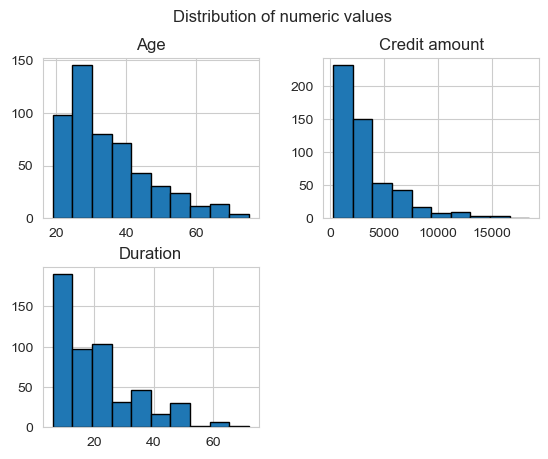

In [34]:
df[["Age","Credit amount","Duration"]].hist(bins=10,edgecolor="black")
plt.suptitle("Distribution of numeric values", fontsize=12)
plt.show()

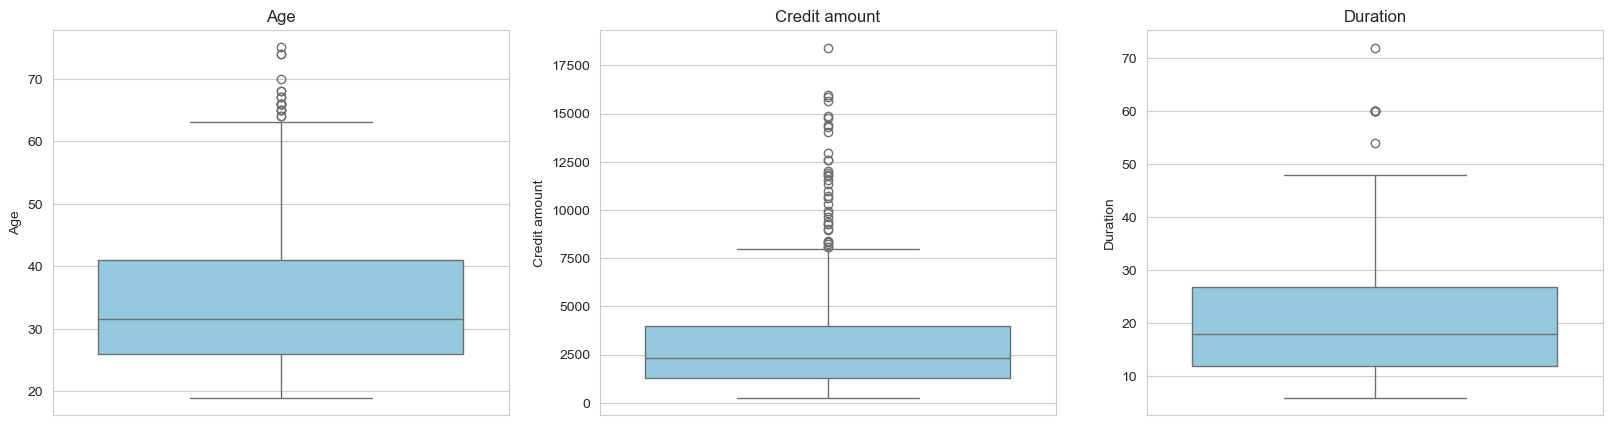

In [37]:
plt.figure(figsize=(20,5))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)
plt.show()

In [39]:
df.query("Duration>=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [46]:
categorical_col=["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

C:\Users\jayas\AppData\Local\Temp\ipykernel_30752\669454181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette ="Set2")
C:\Users\jayas\AppData\Local\Temp\ipykernel_30752\669454181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette ="Set2")
C:\Users\jayas\AppData\Local\Temp\ipykernel_30752\669454181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette ="Set2")
C:\Users\jayas\AppData\Local\Temp\ipykernel_30752\669454181.py:4: FutureWarning: 

Passing `palette` witho

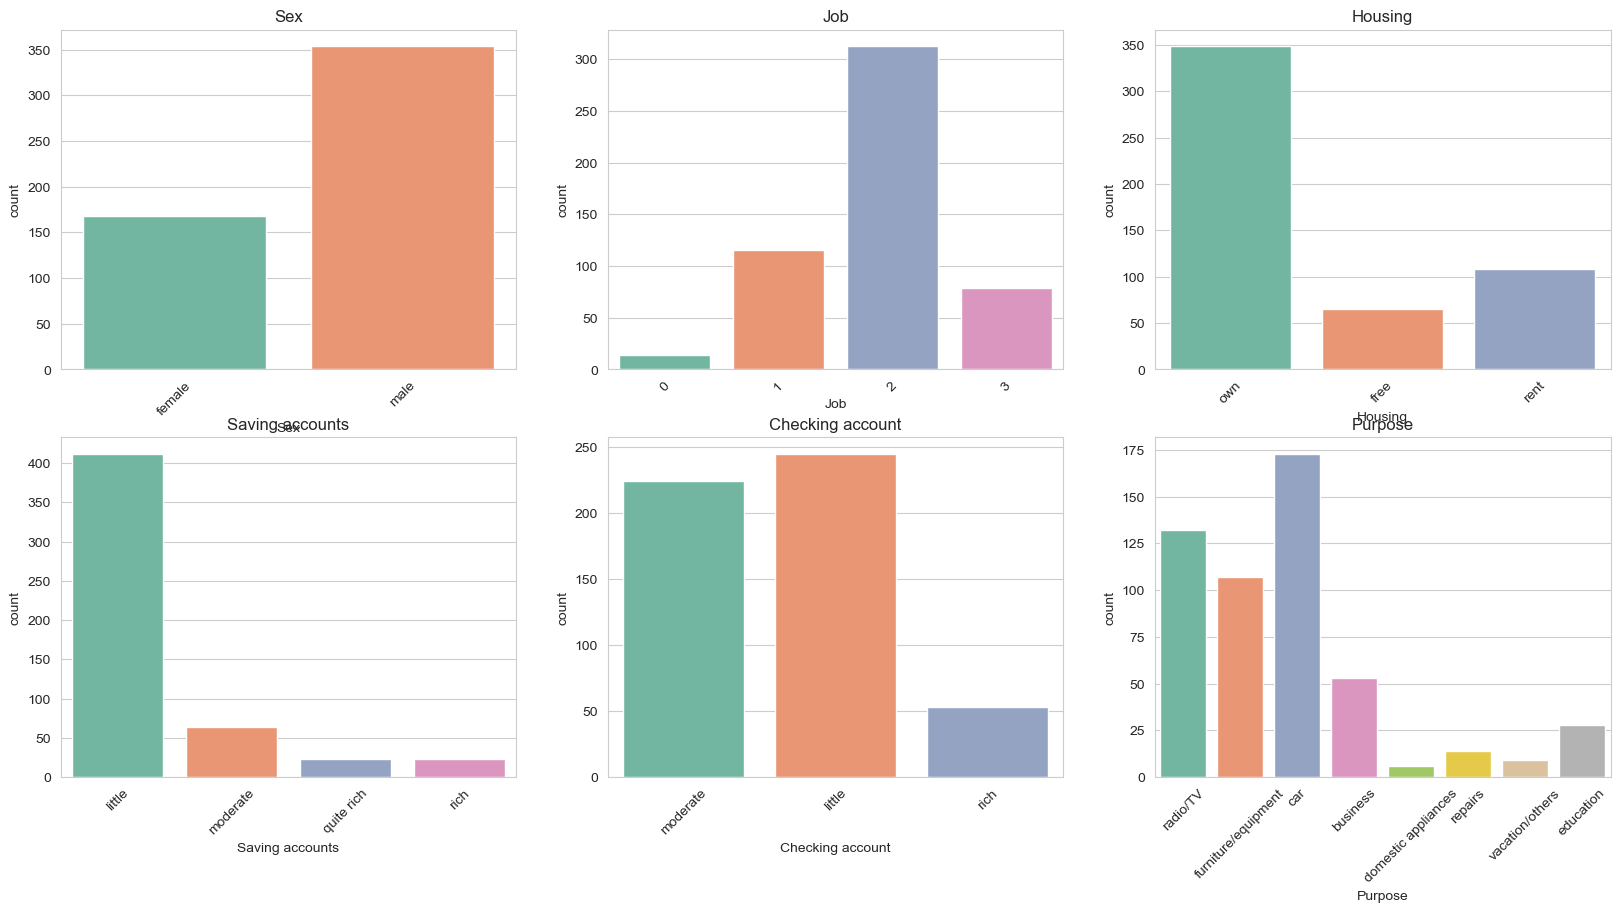

In [50]:
plt.figure(figsize=(20,15))
for i, col in enumerate (categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col, palette ="Set2")
    plt.title(col)
    plt.xticks(rotation=45)
plt.show()

In [52]:
corr =df[["Age","Job","Credit amount","Duration"]].corr()

In [53]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


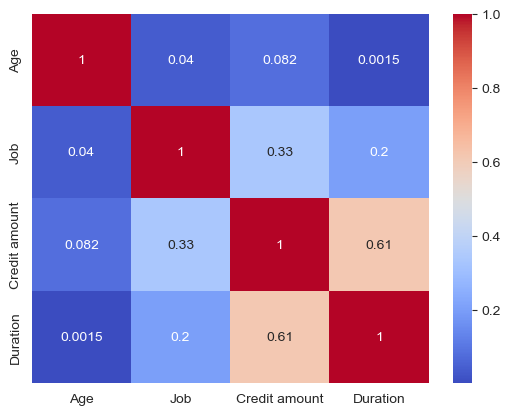

In [57]:
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [58]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [59]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [63]:
df.pivot_table(df,values ="Credit amount",index="Housing",Colunm="Purpose")

TypeError: DataFrame.pivot_table() got multiple values for argument 'values'

In [64]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Feature Engineering

In [65]:
features=["Age",'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']

In [67]:
target ="Risk"

In [70]:
df_model = df[features +[target]].copy()

In [71]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [72]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [76]:
cat_cols=df_model.select_dtypes(include="object").columns.drop("Risk")

In [77]:
le_dict={}

In [78]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [83]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col]=le
    joblib.dump(le,f"{col}_encoder.pkl")

In [87]:
le_target=LabelEncoder()

In [85]:
target

'Risk'

In [90]:
df_model[target] =le_target.fit_transform(df_model[target])

In [91]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [92]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [93]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [98]:
from sklearn.model_selection import train_test_split

In [100]:
X= df_model.drop(target,axis=1)

In [101]:
y= df_model[target]

In [102]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [103]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [104]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [105]:
X_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
295,29,0,2,1,0,2,683,6
171,28,1,2,1,3,0,2659,18
22,33,0,3,1,0,2,1474,12
339,38,1,1,1,0,1,1308,15
173,31,1,2,1,0,2,4473,36
...,...,...,...,...,...,...,...,...
355,34,1,2,1,3,1,3496,30
281,42,1,3,0,0,0,7763,48
136,39,0,1,1,3,0,666,6
485,23,0,2,1,0,0,1498,12


In [110]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -- ------------------------------------- 5.0/72.0 MB 25.2 MB/s eta 0:00:03
   ------- -------------------------------- 13.4/72.0 MB 33.3 MB/s eta 0:00:02
   ------------- -------------------------- 23.9/72.0 MB 37.6 MB/s eta 0:00:02
   ------------------- -------------------- 34.3/72.0 MB 39.9 MB/s eta 0:00:01
   ------------------------ --------------- 43.5/72.0 MB 40.7 MB/s eta 0:00:01
   ----------------------------- ---------- 52.7/72.0 MB 41.1 MB/s eta 0:00:01
   --------------------------------- ------ 59.5/72.0 MB 39.8 MB/s eta 0:00:01
   -------------------------------------- - 68.9/72.0 MB 40.4 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 40.7 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 33.9 MB/s eta 0:00:00


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

In [160]:
def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    grid=GridSearchCV(model,param_grid,cv=5,scoring="accuracy",n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    y_pred=best_model.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    return best_model, acc, grid.best_params_
    

In [161]:
dt =DecisionTreeClassifier(random_state=1, class_weight ="balanced")
dt_param_grid ={
    "max_depth" :[3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [162]:
best_dt,acc_dt,params_dt =train_model(dt,dt_param_grid,X_train,y_train,X_test,y_test)

In [163]:
print("DecisionTree accuracy" ,acc_dt)

DecisionTree accuracy 0.580952380952381


In [164]:
rf =RandomForestClassifier(random_state=1, class_weight="balanced", n_jobs= -1)
rf_param_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [165]:
best_rf,acc_rf,param_rf=train_model(rf,rf_param_grid,X_train,y_train,X_test,y_test)

In [166]:
print("Random Froest accuracy",acc_rf)

Random Froest accuracy 0.6190476190476191


In [168]:
et =ExtraTreesClassifier(random_state=1, class_weight="balanced", n_jobs= -1)
et_param_grid={
    "n_estimators":[100,200],
    "max_depth":[5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [169]:
best_et,acc_et,params_et=train_model(et,et_param_grid,X_train,y_train,X_test,y_test)

In [170]:
print("extra trees classifier accuracy:", acc_et)

extra trees classifier accuracy: 0.6476190476190476


In [171]:
  xgb =XGBClassifier(random_state=1,eval_metric="logloss")

In [172]:
xgb_param_grid={
    "n_estimators":[100,200],
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.7,1],
    "colsample_bytree":[0.7,1]
}

In [173]:
best_xgb,acc_xgb,parms_xgp =train_model(xgb,xgb_param_grid,X_train,y_train,X_test,y_test)

In [175]:
print("XGBAccuracy:", acc_xgb)

XGBAccuracy: 0.7142857142857143


In [176]:
best_xgb.predict(X_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [178]:
joblib.dump(best_xgb,"xgb_classifier.pkl")

['xgb_classifier.pkl']